In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
hdulist = fits.open('data/allStarLite-dr17-synspec_rev1.fits')


In [3]:

hdu1_data = hdulist[1].data


In [4]:
df4 = pd.DataFrame(hdu1_data.tolist(), columns=hdu1_data.names)

In [5]:
df = df4

In [6]:
df["SNR"]

0         418.927612
1         827.156494
2         229.875061
3         121.325897
4         221.824417
             ...    
733896    137.181641
733897    203.667267
733898    130.770752
733899     33.586742
733900    209.745667
Name: SNR, Length: 733901, dtype: float64

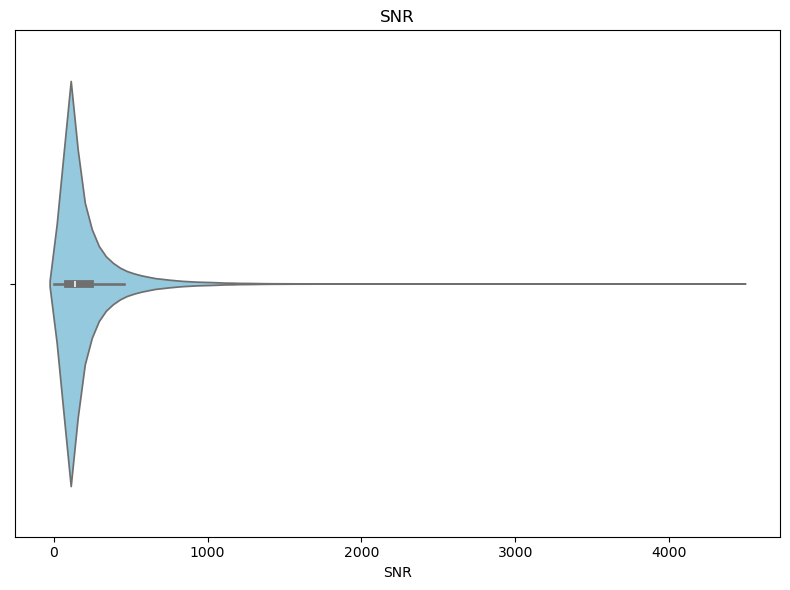

In [7]:
# Définir la taille de la figure
plt.figure(figsize=(8, 6))

# Créer un violin plot pour chaque colonne de chemical_subset
sns.violinplot(x=df['SNR'], color='skyblue')
plt.title('SNR')

# Ajuster l'espacement
plt.tight_layout()

# Afficher les violin plots
plt.show()


In [8]:
# subset all chemical abundances (collumn name contain "_FE")
chemical_subset = df.filter(regex='_FE', axis=1) 

# merge with + df.filter(regex='_H', axis=1)
chemical_subset = pd.concat([chemical_subset, df.filter(regex='_H', axis=1)], axis=1)

In [9]:
low_variability_columns = []

for col in df.columns:
    try:
        # Si la colonne contient moins de 5 valeurs uniques, on l'ajoute à la liste
        if df[col].nunique() < 5:
            low_variability_columns.append(col)
    except TypeError:
        print(f"error with column {col}")

print("Colonnes avec faible variabilité :", low_variability_columns)



error with column PARAMFLAG
error with column X_H
error with column X_H_ERR
error with column X_M
error with column X_M_ERR
error with column ELEM_CHI2
error with column ELEMFRAC
error with column X_H_SPEC
error with column X_M_SPEC
Colonnes avec faible variabilité : ['TELESCOPE', 'APOGEE2_TARGET4', 'RV_ALPHA', 'RV_CARB', 'MAX_JK', 'P_FE', 'P_FE_SPEC', 'CU_FE', 'CU_FE_SPEC']


In [10]:
# create an error dataset containing all errors 
chemical_errors_subset = chemical_subset.filter(regex='_ERR', axis=1)

# create an error dataset containing all specs
chemical_specs_subset = chemical_subset.filter(regex='_SPEC', axis=1)

# create a dataset containing all the flags
flags_subset = chemical_subset.filter(regex='FLAG', axis=1)

# remove flags, err and spec from the chemical_subset
chemical_subset = chemical_subset.drop(chemical_errors_subset.columns, axis=1)
chemical_subset = chemical_subset.drop(chemical_specs_subset.columns, axis=1)
chemical_subset = chemical_subset.drop(flags_subset.columns, axis=1)






In [11]:
chemical_subset = chemical_subset.drop(columns=['GAIAEDR3_R_HI_GEO', 'GAIAEDR3_R_HI_PHOTOGEO'])
chemical_subset = chemical_subset.drop(columns=['MAX_H', 'MIN_H', 'M_H', 'X_H', 'RV_FEH'])

In [12]:
chemical_specs_subset = chemical_specs_subset.drop(columns=['X_H_SPEC'])

In [13]:
chemical_subset['CU_FE'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CU_FE, dtype: float64

In [14]:
chemical_subset['P_FE'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: P_FE, dtype: float64

In [15]:
chemical_subset['FE_H'].describe()

count    647042.000000
mean         -0.231800
std           0.377003
min          -2.468600
25%          -0.402030
50%          -0.171510
75%           0.014171
max           0.957890
Name: FE_H, dtype: float64

In [16]:
# Limiter les valeurs extrêmes pour mieux voir les distributions principales
chemical_subset_filtered = chemical_subset.apply(lambda x: x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99)))

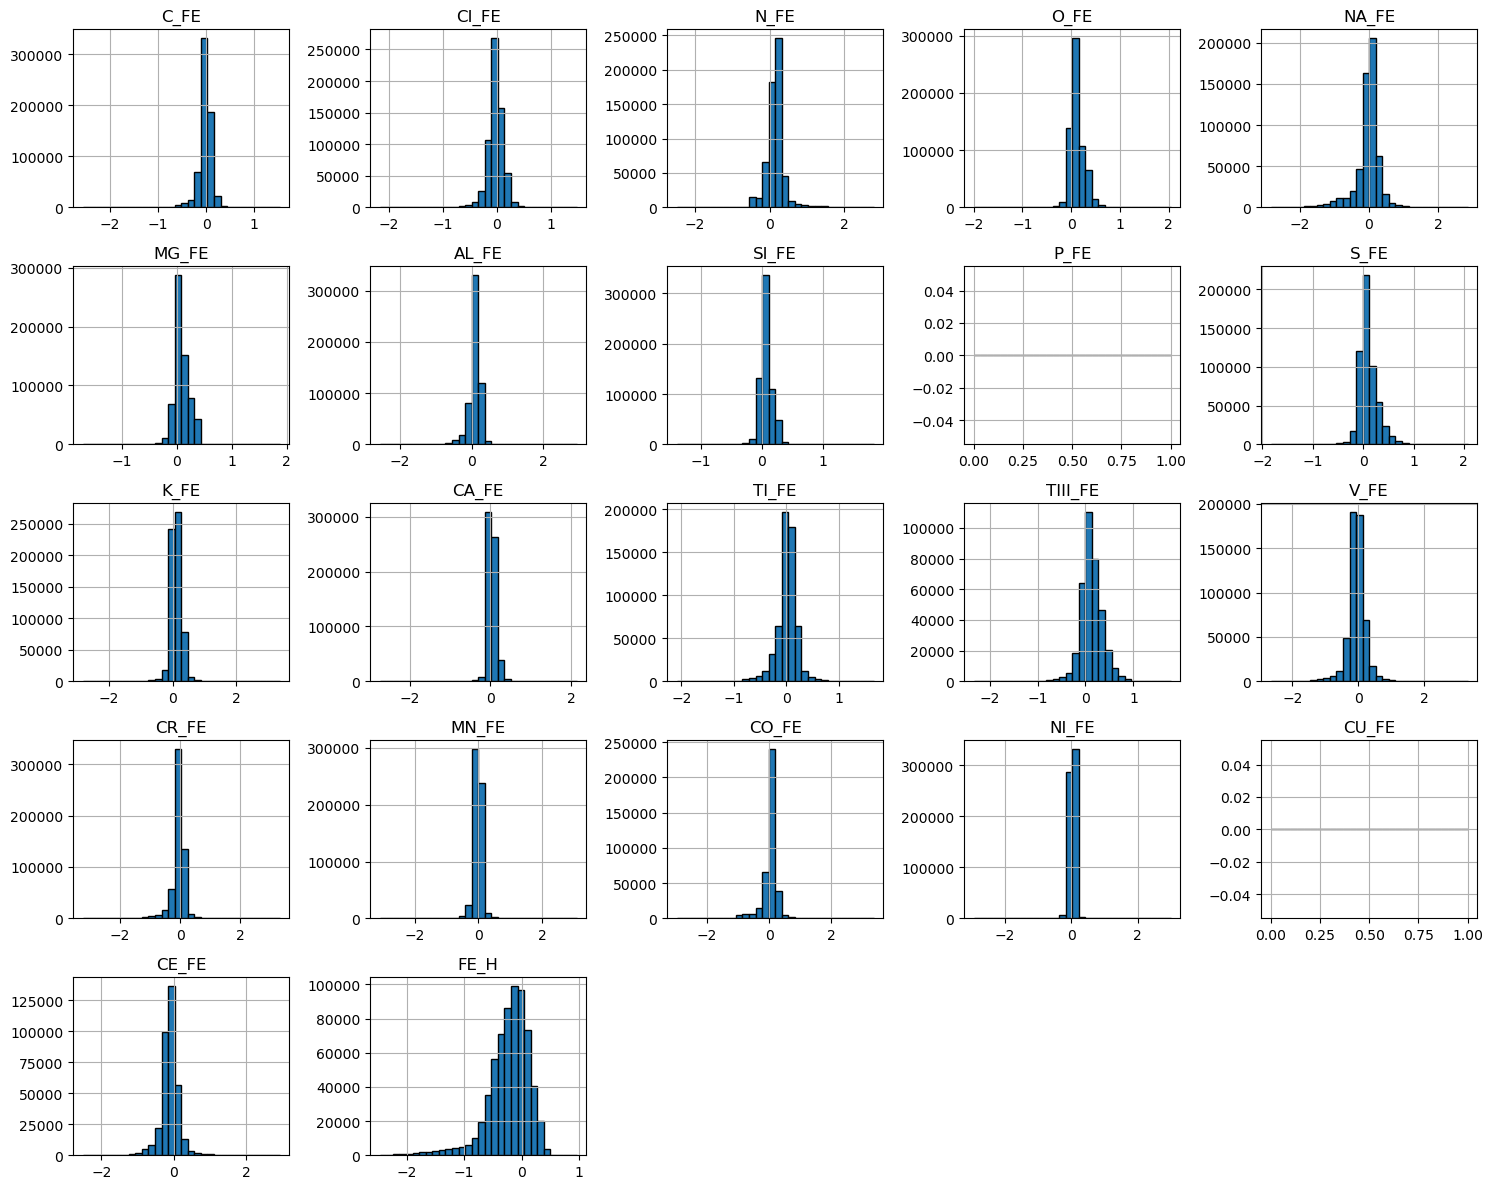

In [17]:
chemical_subset.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


## Box plots (filtré)

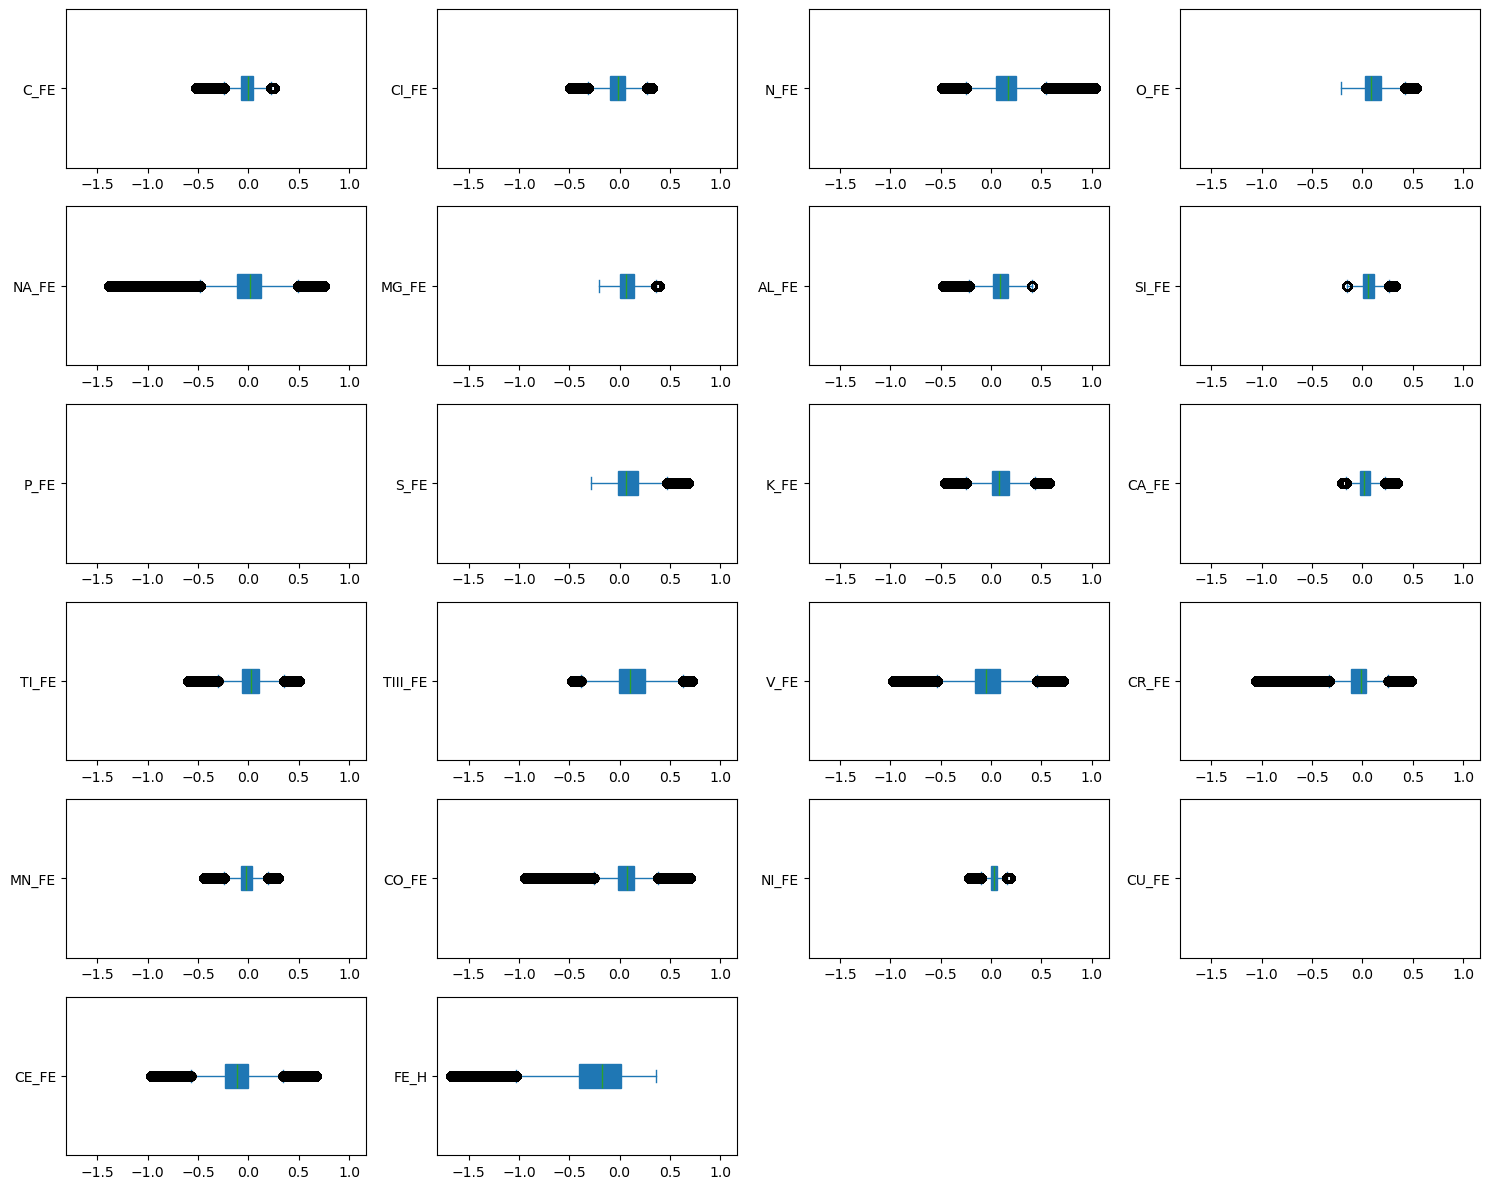

In [18]:
# Créer les boxplots en limitant les valeurs extrêmes
axes = chemical_subset_filtered.plot(kind='box', subplots=True, layout=(6, 4), figsize=(15, 12), patch_artist=True, vert=False)

# Si `axes` est une liste ou un tableau, on itère simplement dessus
for ax in axes:
    ax.xaxis.set_tick_params(labelbottom=True)  # Afficher les étiquettes des axes x
    ax.yaxis.set_tick_params(labelleft=True)    # Afficher les étiquettes des axes y

# Rotation des étiquettes pour les rendre lisibles
plt.xticks(rotation=45)

# Ajuster l'espacement des sous-graphiques
plt.tight_layout()

# Afficher les boxplots
plt.show()



## Boxplots (non filtré)

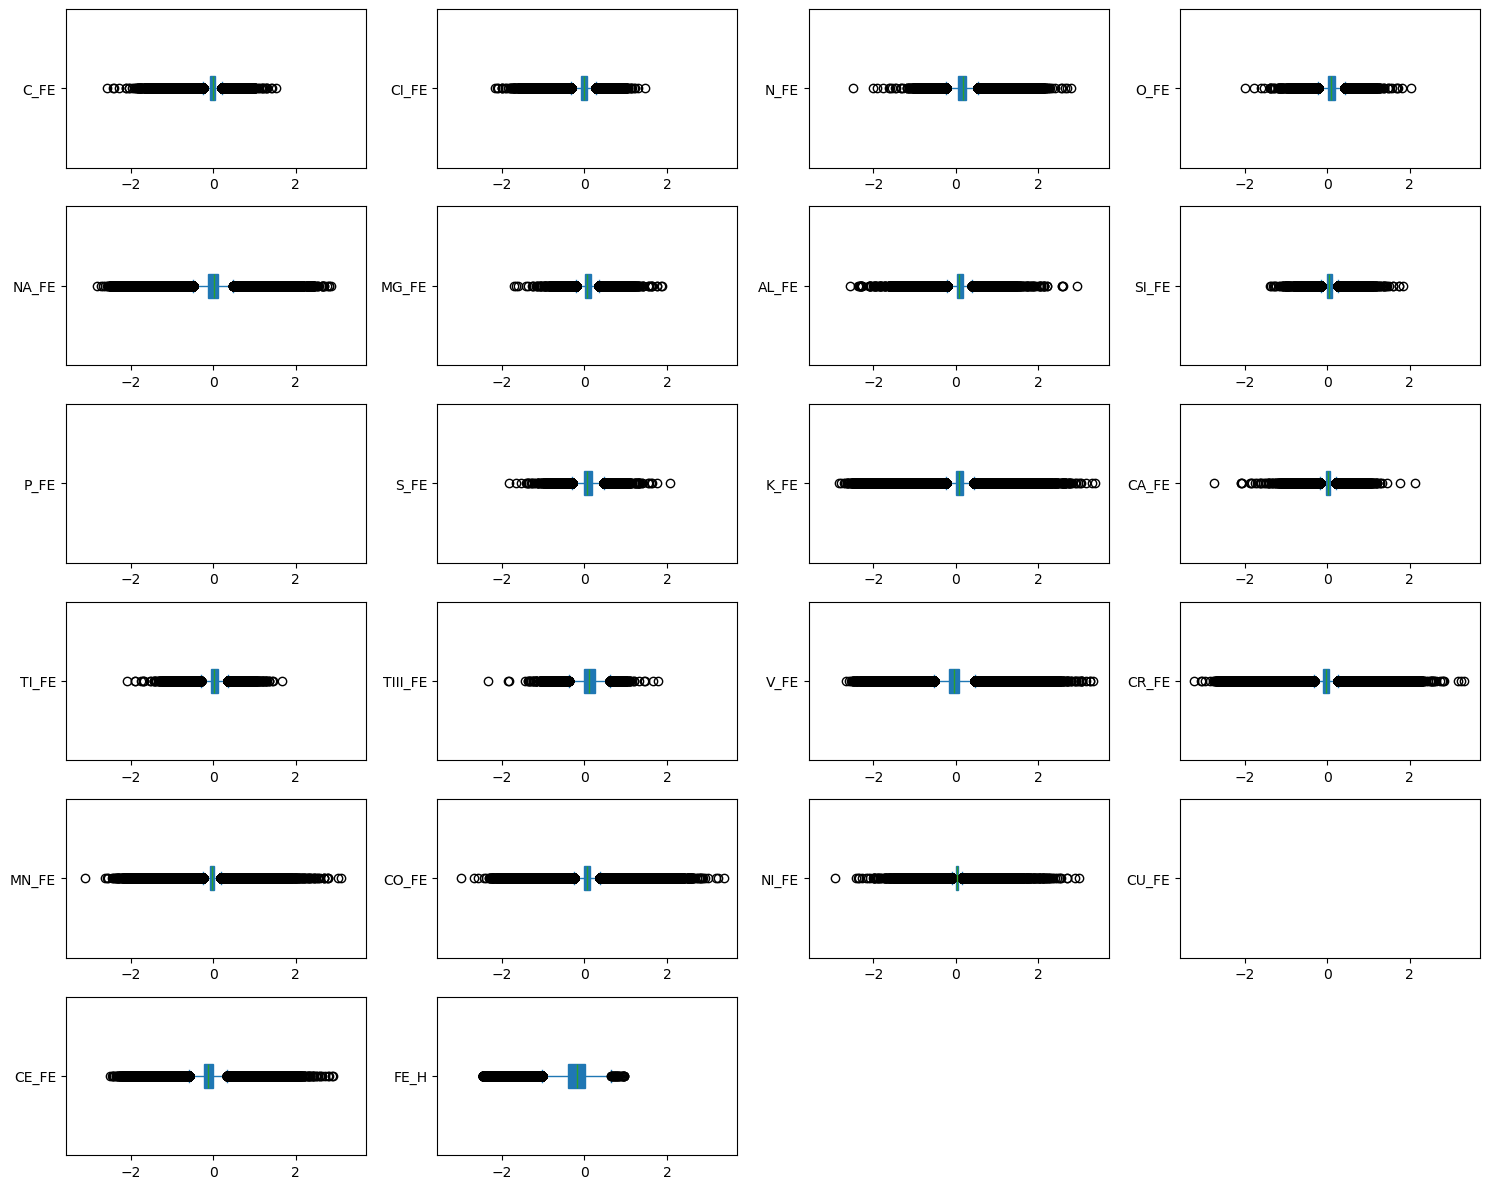

In [19]:
# Créer les boxplots en limitant les valeurs extrêmes
axes = chemical_subset.plot(kind='box', subplots=True, layout=(6, 4), figsize=(15, 12), patch_artist=True, vert=False)

# Si `axes` est une liste ou un tableau, on itère simplement dessus
for ax in axes:
    ax.xaxis.set_tick_params(labelbottom=True)  # Afficher les étiquettes des axes x
    ax.yaxis.set_tick_params(labelleft=True)    # Afficher les étiquettes des axes y

# Rotation des étiquettes pour les rendre lisibles
plt.xticks(rotation=45)

# Ajuster l'espacement des sous-graphiques
plt.tight_layout()

# Afficher les boxplots
plt.show()



## Violin plots (filtré)

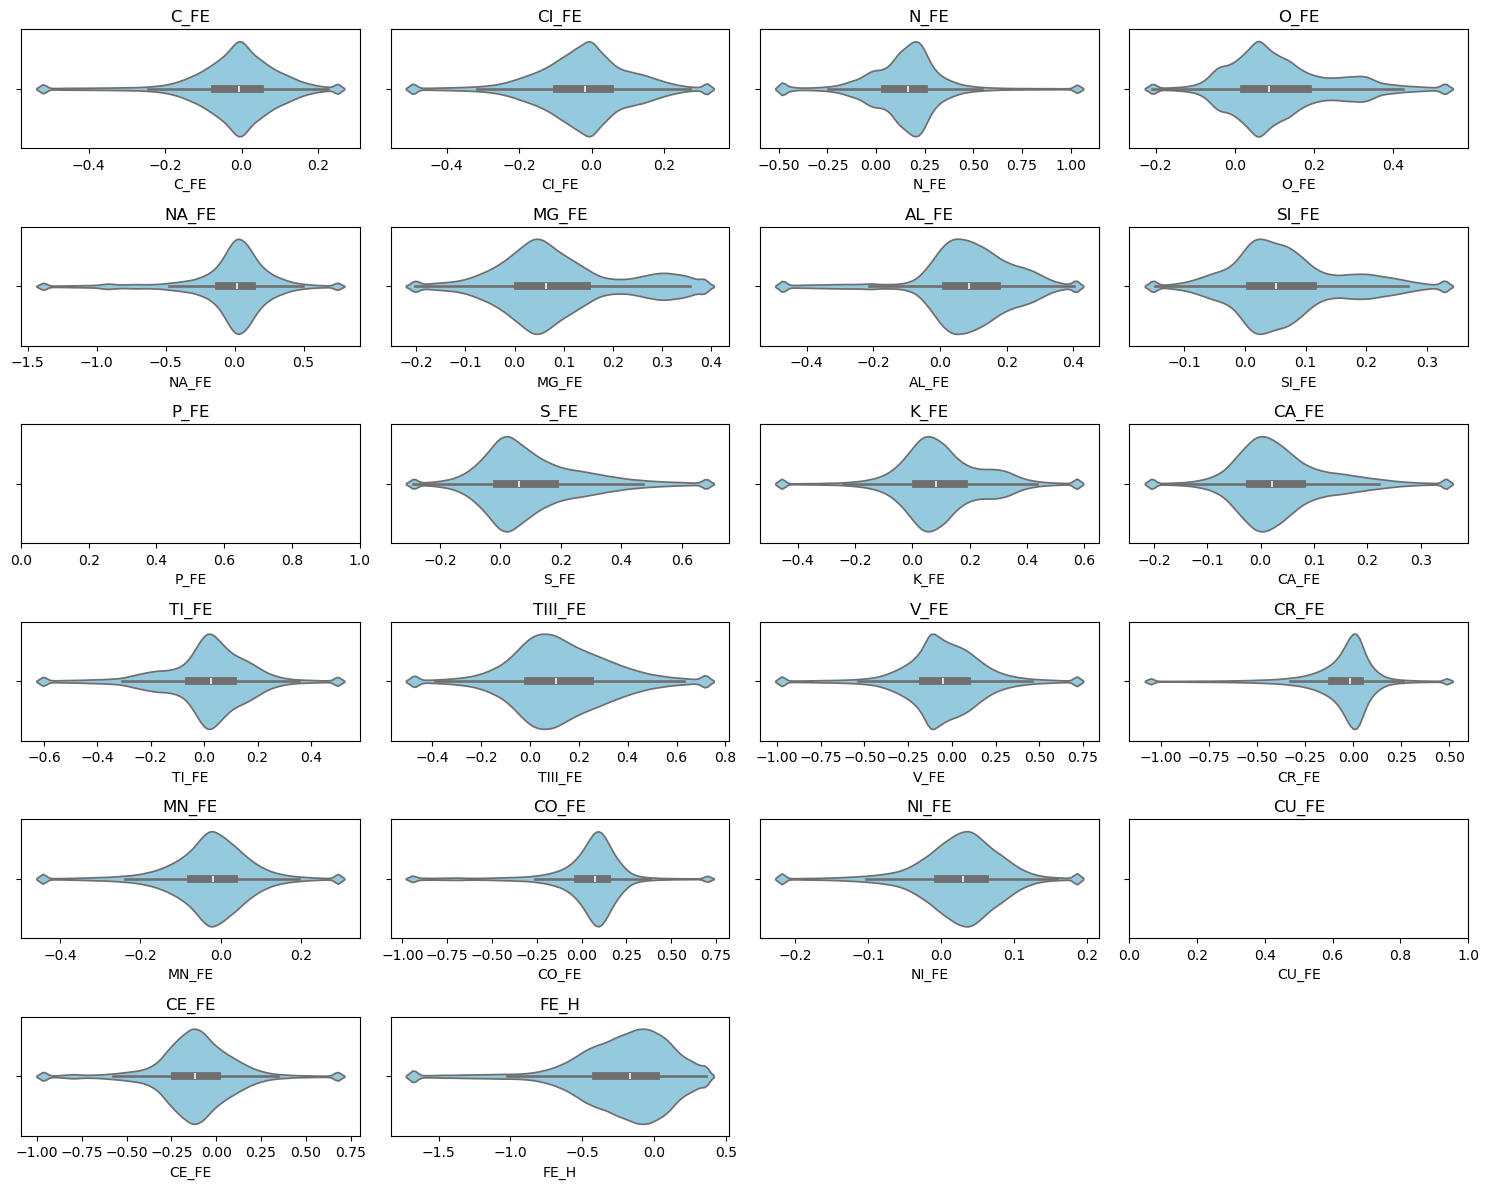

In [20]:
# Définir la taille de la figure
plt.figure(figsize=(15, 12))

# Créer un violin plot pour chaque colonne de chemical_subset
for i, column in enumerate(chemical_subset_filtered.columns, 1):
    plt.subplot(6, 4, i)
    sns.violinplot(x=chemical_subset_filtered[column], color='skyblue')
    plt.title(column)

# Ajuster l'espacement
plt.tight_layout()

# Afficher les violin plots
plt.show()


## Violin plots (non filtré)

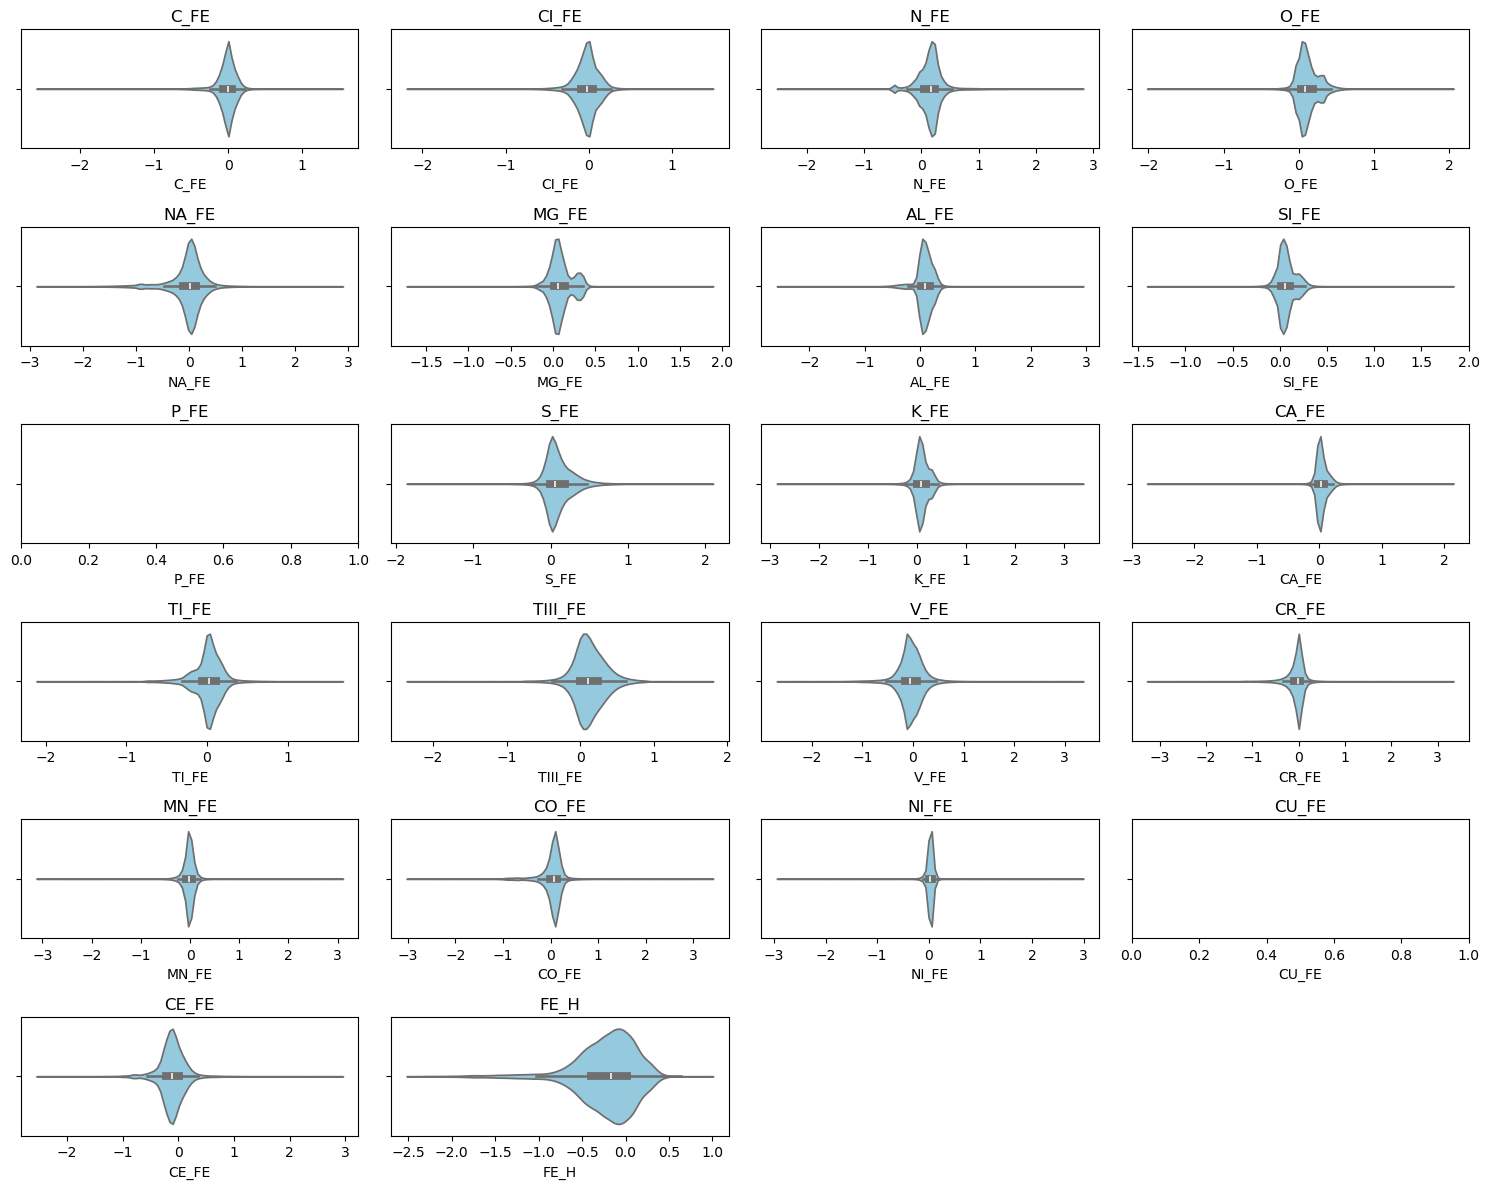

In [21]:
# Définir la taille de la figure
plt.figure(figsize=(15, 12))

# Créer un violin plot pour chaque colonne de chemical_subset
for i, column in enumerate(chemical_subset.columns, 1):
    plt.subplot(6, 4, i)
    sns.violinplot(x=chemical_subset[column], color='skyblue')
    plt.title(column)

# Ajuster l'espacement
plt.tight_layout()

# Afficher les violin plots
plt.show()


In [22]:
chemical_subset.describe()

,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,...,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE,FE_H
count,643860.000000,640781.000000,591028.000000,643504.000000,567221.000000,646291.000000,572099.000000,646151.000000,0.0,558938.000000,...,582657.000000,363726.000000,549071.000000,569551.000000,578038.000000,388270.000000,633827.000000,0.0,353995.000000,647042.000000
mean,-0.019660,-0.026724,0.153415,0.113316,-0.037907,0.086484,0.084597,0.066517,NaN,0.097430,...,0.010108,0.122660,-0.048044,-0.060618,-0.026615,0.033257,0.024392,NaN,-0.120582,-0.231800
std,0.136690,0.151087,0.235277,0.147854,0.362338,0.134797,0.163549,0.101628,NaN,0.182535,...,0.184133,0.219318,0.279651,0.245639,0.141188,0.265784,0.092472,NaN,0.270995,0.377003
min,-2.569600,-2.167200,-2.484940,-1.998207,-2.827178,-1.709735,-2.566144,-1.392327,NaN,-1.834437,...,-2.088917,-2.328021,-2.651900,-3.240002,-3.103417,-2.981460,-2.930750,NaN,-2.510510,-2.468600
25%,-0.068629,-0.096530,0.048654,0.024019,-0.114108,0.006522,0.017449,0.007887,NaN,-0.012126,...,-0.058469,-0.006145,-0.163818,-0.109462,-0.075277,-0.019135,-0.004694,NaN,-0.228593,-0.402030
50%,-0.007691,-0.019620,0.164520,0.085721,0.017664,0.063213,0.087211,0.051817,NaN,0.061823,...,0.023871,0.105329,-0.052727,-0.018022,-0.020378,0.072580,0.029368,NaN,-0.117369,-0.171510
75%,0.049114,0.050469,0.245960,0.184313,0.128914,0.146786,0.171701,0.111780,NaN,0.181282,...,0.106538,0.247839,0.084922,0.038074,0.032915,0.141343,0.060413,NaN,0.001460,0.014171
max,1.529500,1.473540,2.791340,2.039563,2.847242,1.872143,2.931121,1.827411,NaN,2.074592,...,1.660383,1.774699,3.326362,3.309864,3.088052,3.374180,2.982033,NaN,2.913390,0.957890


In [23]:
chemical_subset.corr(method='pearson', min_periods=1, numeric_only=True).style.background_gradient(cmap='coolwarm')

c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE,FE_H
C_FE,1.000000,0.776669,-0.155308,0.251267,0.043986,0.361443,0.445123,0.253973,nan,0.062103,0.181440,0.064941,0.283240,0.130550,0.040807,0.036246,0.091266,0.183211,0.310320,nan,-0.062712,0.194015
CI_FE,0.776669,1.000000,-0.240384,0.387944,-0.005214,0.433609,0.439977,0.386250,nan,0.188420,0.238042,0.182650,0.182924,0.214625,0.081544,-0.042789,-0.075701,0.127613,0.259503,nan,-0.067568,-0.042432
N_FE,-0.155308,-0.240384,1.000000,-0.081371,0.129418,-0.074207,-0.068600,-0.022089,nan,0.021632,0.008599,-0.048858,0.124550,-0.084941,0.000913,0.094127,0.112871,0.082925,0.004151,nan,0.134573,-0.021196
O_FE,0.251267,0.387944,-0.081371,1.000000,-0.005937,0.735833,0.263221,0.699299,nan,0.496943,0.351483,0.469054,0.234642,0.378816,0.103221,-0.024824,-0.386418,0.037657,0.202327,nan,-0.140431,-0.491500
NA_FE,0.043986,-0.005214,0.129418,-0.005937,1.000000,0.072841,0.019470,0.007970,nan,0.004771,0.073596,0.022364,0.108983,-0.050770,0.052088,0.134320,0.113241,0.148925,0.137192,nan,-0.009874,0.037523
MG_FE,0.361443,0.433609,-0.074207,0.735833,0.072841,1.000000,0.415851,0.756919,nan,0.545815,0.434394,0.524235,0.404755,0.424500,0.114404,0.073875,-0.313553,0.105421,0.294937,nan,-0.125596,-0.449169
AL_FE,0.445123,0.439977,-0.068600,0.263221,0.019470,0.415851,1.000000,0.440596,nan,0.070689,0.258228,0.237220,0.162470,0.274245,0.094147,-0.039046,-0.070674,0.064621,0.288883,nan,-0.053357,0.080951
SI_FE,0.253973,0.386250,-0.022089,0.699299,0.007970,0.756919,0.440596,1.000000,nan,0.478745,0.335987,0.458307,0.200050,0.405992,0.114862,-0.075259,-0.338194,0.070838,0.220578,nan,-0.090952,-0.454281
P_FE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
S_FE,0.062103,0.188420,0.021632,0.496943,0.004771,0.545815,0.070689,0.478745,nan,1.000000,0.316590,0.423916,0.193623,0.331468,0.030498,0.040016,-0.374576,0.009608,0.091340,nan,-0.031129,-0.572522


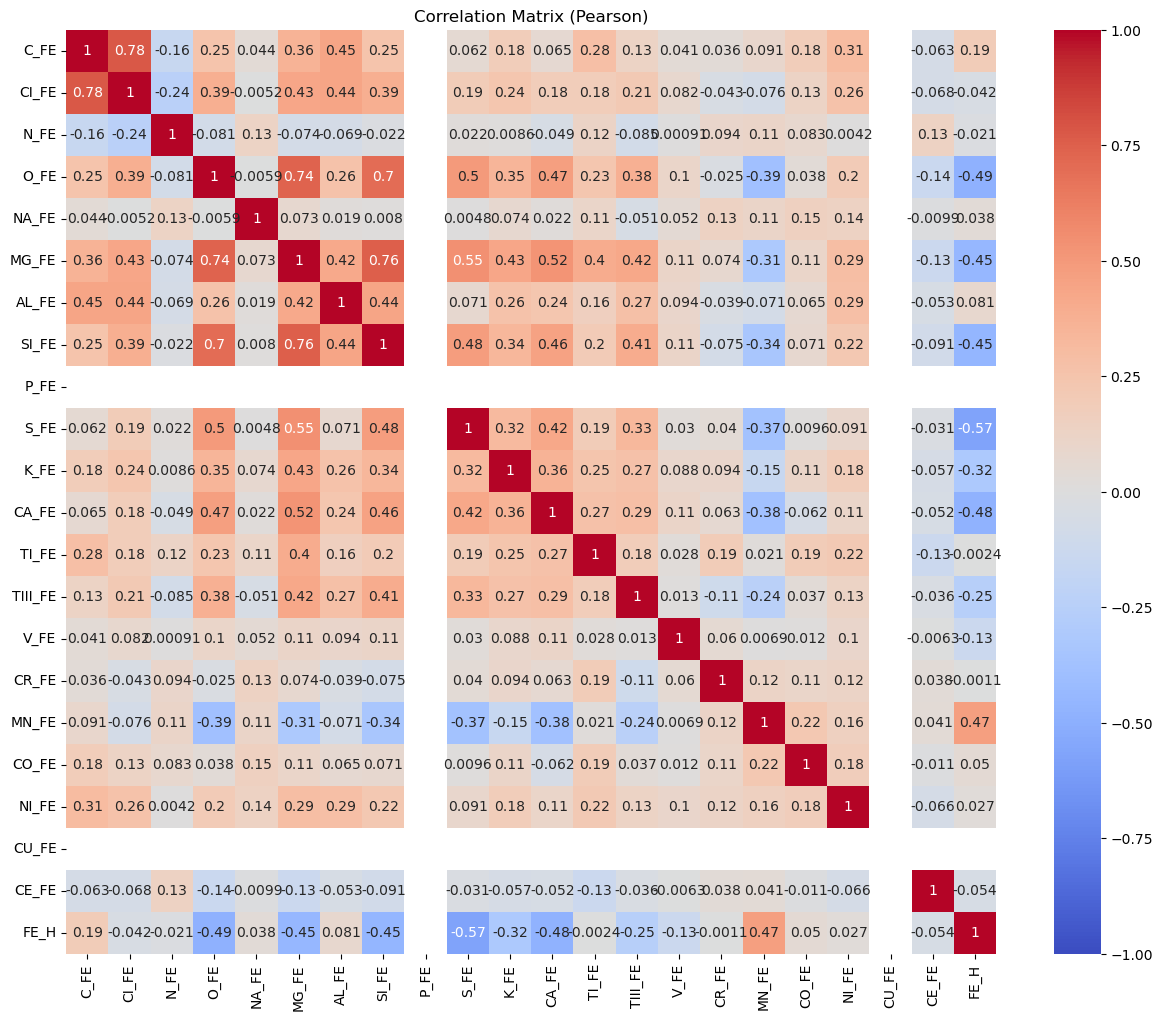

In [24]:
# Calculer la matrice de corrélation
correlation_matrix = chemical_subset.corr(method='pearson', min_periods=1, numeric_only=True)

# Créer une figure et une heatmap
plt.figure(figsize=(15, 12))  # Ajuste la taille de l'image
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Correlation Matrix (Pearson)')

# Afficher la heatmap
plt.show()

In [25]:
chemical_subset.corr(method='kendall', min_periods=1, numeric_only=True).style.background_gradient(cmap='coolwarm')

c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE,FE_H
C_FE,1.000000,0.616433,-0.150247,0.254309,0.080063,0.320101,0.289474,0.252650,nan,0.177540,0.254480,0.101481,0.309994,0.142690,0.022192,0.057574,-0.058208,0.260641,0.324168,nan,-0.206534,-0.018089
CI_FE,0.616433,1.000000,-0.251406,0.320976,0.031306,0.312014,0.351783,0.332160,nan,0.216792,0.269327,0.159347,0.182734,0.199638,0.056751,-0.045982,-0.177852,0.208925,0.246137,nan,-0.163958,-0.152923
N_FE,-0.150247,-0.251406,1.000000,-0.109420,0.128983,-0.095236,-0.145125,-0.101411,nan,-0.020757,-0.028299,-0.109682,0.037675,-0.132269,-0.054470,0.091446,0.183657,0.032045,0.019551,nan,0.108404,0.089231
O_FE,0.254309,0.320976,-0.109420,1.000000,-0.037262,0.574478,0.298358,0.547704,nan,0.382875,0.330219,0.375787,0.226317,0.324445,0.073252,-0.060058,-0.359252,0.123015,0.231812,nan,-0.118277,-0.372327
NA_FE,0.080063,0.031306,0.128983,-0.037262,1.000000,0.017835,0.018690,-0.014679,nan,-0.029961,0.046055,-0.036580,0.095673,-0.037091,0.016870,0.089561,0.139356,0.158521,0.149830,nan,-0.080620,0.126258
MG_FE,0.320101,0.312014,-0.095236,0.574478,0.017835,1.000000,0.343388,0.534000,nan,0.426336,0.394833,0.442819,0.352411,0.318428,0.075653,0.046765,-0.341942,0.144835,0.311483,nan,-0.144473,-0.357375
AL_FE,0.289474,0.351783,-0.145125,0.298358,0.018690,0.343388,1.000000,0.462280,nan,0.143699,0.280634,0.293295,0.136905,0.258127,0.106356,-0.094665,-0.228722,0.099618,0.238592,nan,-0.087103,-0.162686
SI_FE,0.252650,0.332160,-0.101411,0.547704,-0.014679,0.534000,0.462280,1.000000,nan,0.309913,0.291734,0.362600,0.158385,0.334657,0.105482,-0.138002,-0.330857,0.110995,0.230254,nan,-0.115058,-0.326181
P_FE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
S_FE,0.177540,0.216792,-0.020757,0.382875,-0.029961,0.426336,0.143699,0.309913,nan,1.000000,0.327094,0.361065,0.190395,0.301396,0.009731,0.019150,-0.348334,0.059321,0.131654,nan,-0.024134,-0.456216


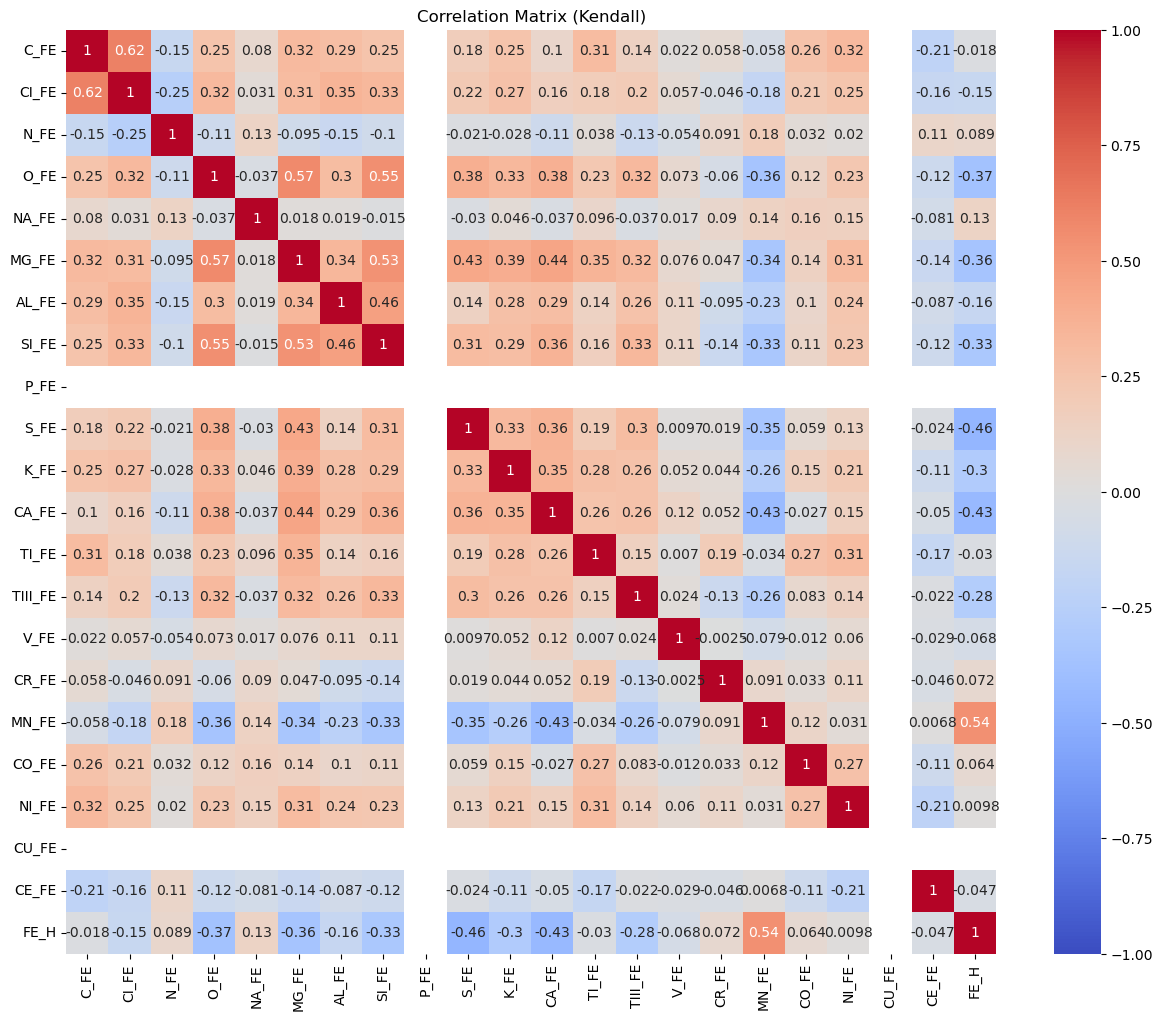

In [26]:
# Calculer la matrice de corrélation
correlation_matrix = chemical_subset.corr(method='kendall', min_periods=1, numeric_only=True)

# Créer une figure et une heatmap
plt.figure(figsize=(15, 12))  # Ajuste la taille de l'image
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Correlation Matrix (Kendall)')

# Afficher la heatmap
plt.show()

In [27]:
chemical_subset.corr(method='spearman', min_periods=1, numeric_only=True).style.background_gradient(cmap='coolwarm')

c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CU_FE,CE_FE,FE_H
C_FE,1.000000,0.784961,-0.213652,0.368118,0.115616,0.460081,0.410410,0.365420,nan,0.250767,0.362563,0.163898,0.439968,0.215076,0.032152,0.081745,-0.093918,0.360155,0.452961,nan,-0.288322,-0.032772
CI_FE,0.784961,1.000000,-0.357343,0.455686,0.044390,0.448542,0.490193,0.469124,nan,0.312446,0.387832,0.249251,0.270686,0.294283,0.082156,-0.069760,-0.260937,0.287014,0.348696,nan,-0.230373,-0.220837
N_FE,-0.213652,-0.357343,1.000000,-0.150581,0.177706,-0.125381,-0.206580,-0.146366,nan,-0.023742,-0.035374,-0.152046,0.064829,-0.186026,-0.079051,0.132314,0.260218,0.049921,0.032146,nan,0.153002,0.128581
O_FE,0.368118,0.455686,-0.150581,1.000000,-0.051380,0.737649,0.411718,0.717520,nan,0.528897,0.464845,0.518519,0.324313,0.460008,0.108251,-0.086556,-0.505256,0.169663,0.328455,nan,-0.169355,-0.530632
NA_FE,0.115616,0.044390,0.177706,-0.051380,1.000000,0.028527,0.030171,-0.017549,nan,-0.042104,0.067073,-0.049257,0.134280,-0.052384,0.022392,0.125473,0.193608,0.218807,0.212275,nan,-0.113246,0.177447
MG_FE,0.460081,0.448542,-0.125381,0.737649,0.028527,1.000000,0.475315,0.700365,nan,0.581371,0.546658,0.600124,0.490845,0.457470,0.112871,0.068249,-0.481137,0.207624,0.437009,nan,-0.207903,-0.515955
AL_FE,0.410410,0.490193,-0.206580,0.411718,0.030171,0.475315,1.000000,0.600988,nan,0.206323,0.397453,0.398855,0.205476,0.370522,0.152863,-0.137269,-0.308725,0.145711,0.338045,nan,-0.124545,-0.213715
SI_FE,0.365420,0.469124,-0.146366,0.717520,-0.017549,0.700365,0.600988,1.000000,nan,0.440902,0.421382,0.501563,0.238477,0.475754,0.152685,-0.199329,-0.467104,0.159452,0.326696,nan,-0.165096,-0.462079
P_FE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
S_FE,0.250767,0.312446,-0.023742,0.528897,-0.042104,0.581371,0.206323,0.440902,nan,1.000000,0.461791,0.508388,0.274503,0.425295,0.017030,0.031868,-0.489801,0.082862,0.187916,nan,-0.036642,-0.629823


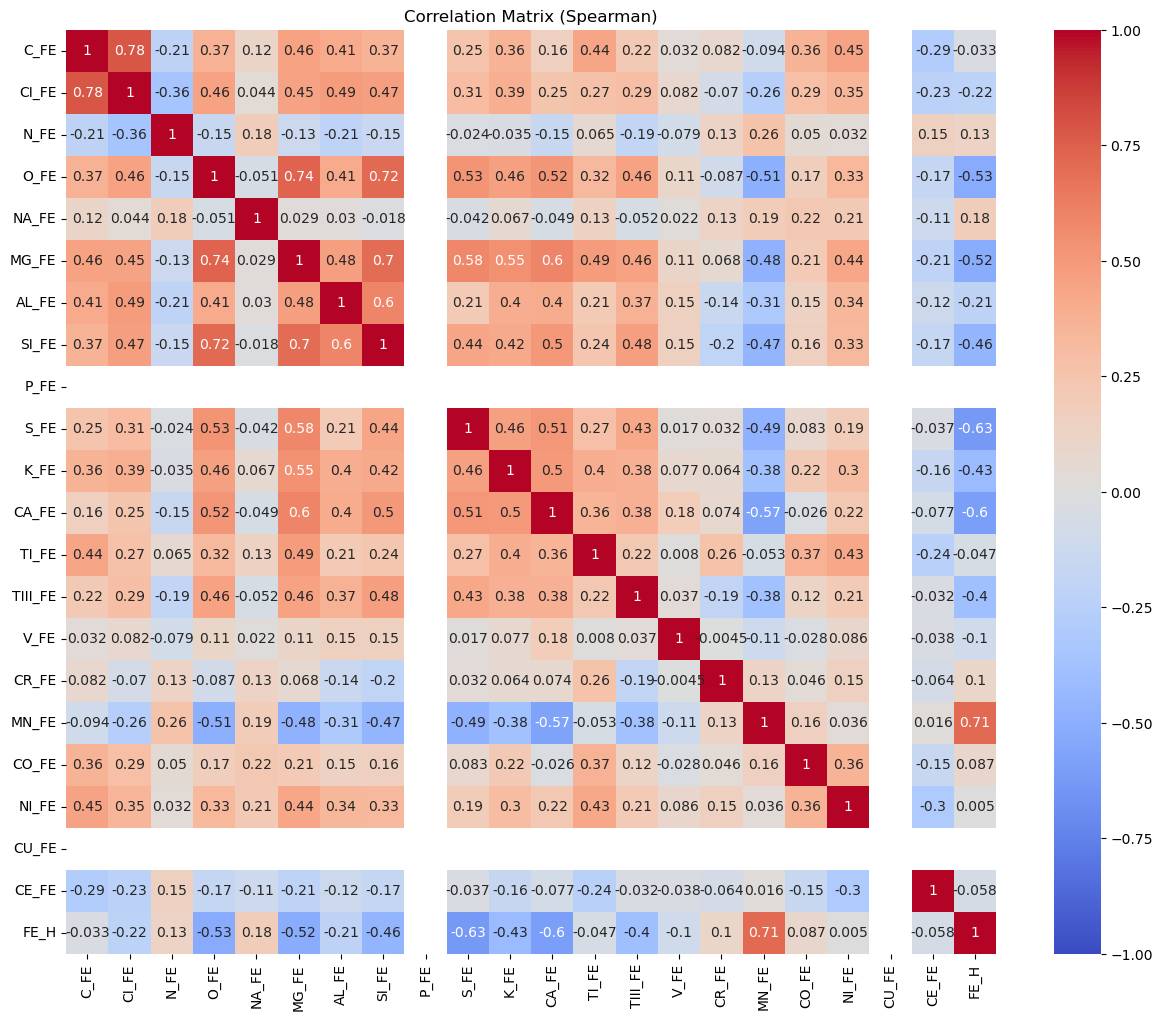

In [28]:
# Calculer la matrice de corrélation
correlation_matrix = chemical_subset.corr(method='spearman', min_periods=1, numeric_only=True)

# Créer une figure et une heatmap
plt.figure(figsize=(15, 12))  # Ajuste la taille de l'image
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Correlation Matrix (Spearman)')

# Afficher la heatmap
plt.show()

In [29]:
print(chemical_specs_subset.columns)
print(chemical_subset.columns)

Index(['C_FE_SPEC', 'CI_FE_SPEC', 'N_FE_SPEC', 'O_FE_SPEC', 'NA_FE_SPEC',
       'MG_FE_SPEC', 'AL_FE_SPEC', 'SI_FE_SPEC', 'P_FE_SPEC', 'S_FE_SPEC',
       'K_FE_SPEC', 'CA_FE_SPEC', 'TI_FE_SPEC', 'TIII_FE_SPEC', 'V_FE_SPEC',
       'CR_FE_SPEC', 'MN_FE_SPEC', 'CO_FE_SPEC', 'NI_FE_SPEC', 'CU_FE_SPEC',
       'CE_FE_SPEC', 'FE_H_SPEC'],
      dtype='object')
Index(['C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE',
       'P_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE', 'CR_FE',
       'MN_FE', 'CO_FE', 'NI_FE', 'CU_FE', 'CE_FE', 'FE_H'],
      dtype='object')


In [30]:
chemical_subset = chemical_subset.drop(columns=['FE_H'])
chemical_specs_subset = chemical_specs_subset.drop(columns=['FE_H_SPEC'])

In [31]:
# Renommer les colonnes pour avoir les mêmes noms dans les deux datasets
df1_renamed = chemical_specs_subset.rename(columns=lambda x: x.replace('_FE_SPEC', ''))
df2_renamed = chemical_subset.rename(columns=lambda x: x.replace('_FE', ''))

# Garder uniquement les colonnes communes et les convertir en liste
common_columns = list(set(df1_renamed.columns).intersection(df2_renamed.columns))

# Sélectionner les colonnes communes dans chaque dataframe
df1_common = df1_renamed[common_columns]
df2_common = df2_renamed[common_columns]

# Concaténer les deux datasets le long des colonnes pour pouvoir calculer la corrélation
combined_df = pd.concat([df1_common.add_suffix('_FE_SPEC'), df2_common.add_suffix('_FE')], axis=1)

# Calculer la matrice de corrélation
combined_df.corr(method='spearman', min_periods=1, numeric_only=True).style.background_gradient(cmap='coolwarm')

c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,V_FE_SPEC,TIII_FE_SPEC,K_FE_SPEC,TI_FE_SPEC,CE_FE_SPEC,NI_FE_SPEC,CR_FE_SPEC,NA_FE_SPEC,AL_FE_SPEC,S_FE_SPEC,MN_FE_SPEC,P_FE_SPEC,CA_FE_SPEC,SI_FE_SPEC,MG_FE_SPEC,O_FE_SPEC,CO_FE_SPEC,CU_FE_SPEC,CI_FE_SPEC,N_FE_SPEC,C_FE_SPEC,V_FE,TIII_FE,K_FE,TI_FE,CE_FE,NI_FE,CR_FE,NA_FE,AL_FE,S_FE,MN_FE,P_FE,CA_FE,SI_FE,MG_FE,O_FE,CO_FE,CU_FE,CI_FE,N_FE,C_FE
V_FE_SPEC,1.000000,0.036809,0.011513,-0.042207,-0.038387,0.113286,0.036797,-0.011385,0.071509,-0.016986,-0.118274,nan,0.202763,0.055129,0.040500,0.125031,-0.028029,nan,0.099470,-0.133250,0.016164,0.982263,0.036809,0.026876,-0.065276,-0.038387,0.041387,-0.067438,0.009457,0.182513,-0.050268,-0.084606,nan,0.130986,0.165323,0.044059,0.076291,-0.028029,nan,0.099470,-0.133250,0.016164
TIII_FE_SPEC,0.036809,1.000000,0.377373,0.221690,-0.031620,0.207910,-0.187559,-0.052384,0.370522,0.425295,-0.375832,nan,0.375498,0.475754,0.457470,0.460008,0.118484,nan,0.294283,-0.186026,0.215076,0.036809,1.000000,0.377373,0.221690,-0.031620,0.207909,-0.187561,-0.052384,0.370522,0.425295,-0.375832,nan,0.375498,0.475754,0.457470,0.460008,0.118484,nan,0.294283,-0.186026,0.215076
K_FE_SPEC,0.011513,0.377373,1.000000,0.396263,-0.160924,0.190647,-0.094449,0.106250,0.514424,0.443847,-0.314306,nan,0.416586,0.518098,0.577869,0.435644,0.215764,nan,0.363909,-0.003601,0.356939,0.073924,0.377373,0.994941,0.427046,-0.160925,0.317216,0.089209,0.065819,0.371703,0.481042,-0.377818,nan,0.512109,0.420888,0.575986,0.482397,0.215764,nan,0.363909,-0.003601,0.356939
TI_FE_SPEC,-0.042207,0.221690,0.396263,1.000000,-0.244840,0.281400,0.093887,0.179998,0.358225,0.201676,0.013369,nan,0.242582,0.330158,0.453702,0.243344,0.373360,nan,0.299761,0.002558,0.450367,0.010819,0.221690,0.377181,0.985079,-0.244840,0.408118,0.235525,0.149490,0.231146,0.236414,-0.034023,nan,0.332301,0.229819,0.451689,0.291142,0.373361,nan,0.299761,0.002558,0.450367
CE_FE_SPEC,-0.038387,-0.031620,-0.160924,-0.244840,1.000000,-0.301406,-0.063531,-0.113246,-0.124545,-0.036642,0.015834,nan,-0.077029,-0.165095,-0.207902,-0.169354,-0.153499,nan,-0.230373,0.153001,-0.288322,-0.038387,-0.031620,-0.160924,-0.244840,1.000000,-0.301405,-0.063531,-0.113247,-0.124545,-0.036642,0.015834,nan,-0.077029,-0.165095,-0.207902,-0.169354,-0.153499,nan,-0.230373,0.153001,-0.288322
NI_FE_SPEC,0.113286,0.207910,0.190647,0.281400,-0.301406,1.000000,0.112714,0.189378,0.274323,0.084710,0.056991,nan,0.187104,0.187719,0.259148,0.255704,0.363716,nan,0.398513,-0.114010,0.425975,0.094063,0.207910,0.208534,0.244552,-0.301406,0.906906,0.026242,0.206898,0.403994,0.052187,0.087404,nan,0.114471,0.296659,0.263195,0.212954,0.363717,nan,0.398513,-0.114010,0.425975
CR_FE_SPEC,0.036797,-0.187559,-0.094449,0.093887,-0.063531,0.112714,1.000000,0.098211,-0.156386,-0.135061,0.162321,nan,0.008298,-0.265961,-0.133397,-0.162473,0.045786,nan,-0.012421,-0.075530,0.019144,0.013627,-0.187559,-0.076434,0.039034,-0.063531,0.026230,0.804236,0.125932,-0.055261,-0.159765,0.205524,nan,-0.072630,-0.197242,-0.130023,-0.207376,0.045786,nan,-0.012421,-0.075530,0.019144
NA_FE_SPEC,-0.011385,-0.052384,0.106250,0.179998,-0.113246,0.189378,0.098211,1.000000,0.087712,-0.031468,0.198036,nan,-0.055091,0.050640,0.073375,-0.050403,0.218807,nan,0.035853,0.219560,0.129329,0.019028,-0.052384,0.098856,0.181256,-0.113246,0.238598,0.159606,0.990887,0.014759,-0.001464,0.174615,nan,-0.018691,-0.016929,0.071380,-0.023877,0.218807,nan,0.035853,0.219560,0.129329
AL_FE_SPEC,0.071509,0.370522,0.514424,0.358225,-0.124545,0.274323,-0.156386,0.087712,1.000000,0.308534,-0.243000,nan,0.361297,0.644447,0.647007,0.387313,0.145710,nan,0.351005,0.022217,0.411656,0.141432,0.370522,0.490479,0.416881,-0.124545,0.443987,0.071626,0.039899,0.800632,0.365998,-0.338997,nan,0.502759,0.494042,0.643502,0.462882,0.145711,nan,0.351005,0.022217,0.411656
S_FE_SPEC,-0.016986,0.425295,0.443847,0.201676,-0.036642,0.084710,-0.135061,-0.031468,0.308534,1.000000,-0.462572,nan,0.440349,0.520813,0.540745,0.503058,0.082861,nan,0.361817,-0.094995,0.258797,0.021203,0.425295,0.438900,

In [32]:
# Renommer les colonnes pour avoir les mêmes noms dans les deux datasets
df1_renamed = chemical_specs_subset.rename(columns=lambda x: x.replace('_FE_SPEC', ''))
df2_renamed = chemical_subset.rename(columns=lambda x: x.replace('_FE', ''))

# Garder uniquement les colonnes communes et les convertir en liste
common_columns = list(set(df1_renamed.columns).intersection(df2_renamed.columns))

# Sélectionner les colonnes communes dans chaque dataframe
df1_common = df1_renamed[common_columns]
df2_common = df2_renamed[common_columns]

# Créer une matrice vide pour stocker les corrélations
correlation_matrix = pd.DataFrame(index=[col + '_FE' for col in common_columns], 
                                  columns=[col + '_FE_SPEC' for col in common_columns])

# Remplir la matrice avec les corrélations
for col in common_columns:
    correlation_matrix.loc[col + '_FE', col + '_FE_SPEC'] = df1_common[col].corr(df2_common[col])

# Afficher la matrice de corrélation
correlation_matrix.style.background_gradient(cmap='coolwarm')



,V_FE_SPEC,TIII_FE_SPEC,K_FE_SPEC,TI_FE_SPEC,CE_FE_SPEC,NI_FE_SPEC,CR_FE_SPEC,NA_FE_SPEC,AL_FE_SPEC,S_FE_SPEC,MN_FE_SPEC,P_FE_SPEC,CA_FE_SPEC,SI_FE_SPEC,MG_FE_SPEC,O_FE_SPEC,CO_FE_SPEC,CU_FE_SPEC,CI_FE_SPEC,N_FE_SPEC,C_FE_SPEC
V_FE,0.991717,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TIII_FE,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
K_FE,nan,nan,0.998349,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TI_FE,nan,nan,nan,0.993142,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CE_FE,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NI_FE,nan,nan,nan,nan,nan,0.976732,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CR_FE,nan,nan,nan,nan,nan,nan,0.949018,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NA_FE,nan,nan,nan,nan,nan,nan,nan,0.997228,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AL_FE,nan,nan,nan,nan,nan,nan,nan,nan,0.906230,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
S_FE,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.991837,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


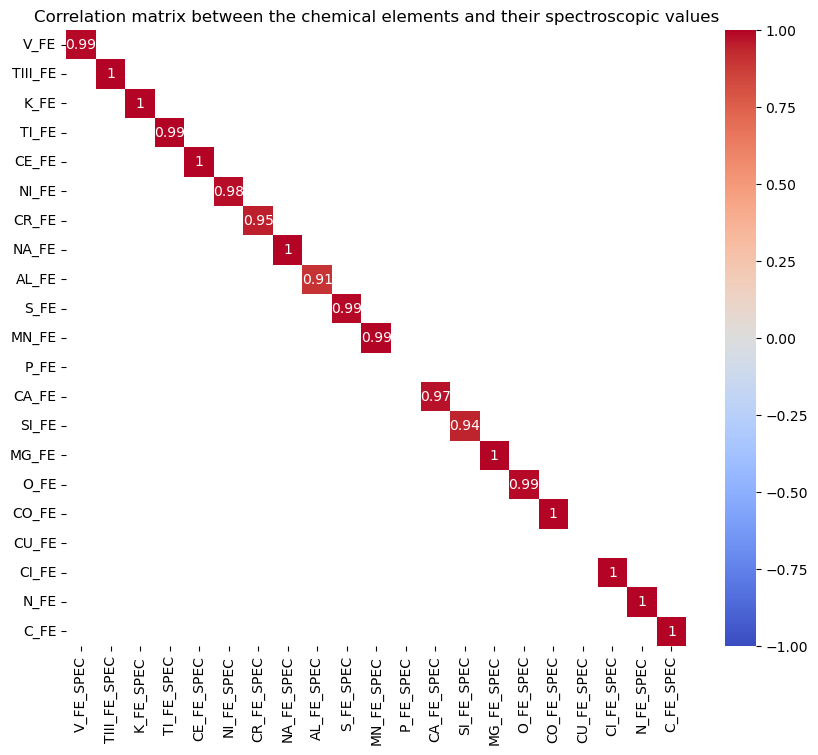

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la matrice de corrélation en valeurs numériques
correlation_matrix_numeric = correlation_matrix.astype(float)

# Créer une figure et une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Correlation matrix between the chemical elements and their spectroscopic values')

# Afficher la heatmap
plt.show()
